# import

In [1]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr#

x=np.sin(np.arange(20))
y=np.arange(20)*0.1+0.3+np.random.randn()
coeff,p_value=pearsonr(x,y)
print(coeff,p_value)

In [2]:
import pandas as pd
import numpy as np


from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular


from datetime import datetime, date, timezone
from datetime import datetime
from datetime import timedelta
from astropy.time import Time
from astropy.io import ascii

import time
import os
from astropy import config as _config
from astroquery.irsa import Irsa   
from astropy import units as u
from astropy.coordinates import SkyCoord

from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
#import matplotlib.cm as cm
import matplotlib.colors as colors
from collections import OrderedDict



from astropy.io import fits 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import cm
from astropy.table import Table
import os
from collections import OrderedDict
from adjustText import adjust_text

In [3]:
import time
import os
from astropy import config as _config
from astroquery.irsa import Irsa 
from astropy import units as u
from astropy.coordinates import SkyCoord

In [4]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

import collections
dd = {"banana": 3, "apple":4, "pear": 1, "orange": 2}

#按key排序
kd = collections.OrderedDict(sorted(dd.items(), key=lambda t: t[0]))
#按照value排序
vd = collections.OrderedDict(sorted(dd.items(),key=lambda t:t[1]))

kd

vd

# BAT_105m_catalog_07jul2019

In [7]:
BAT_105m_catalog_07jul2019=pd.read_csv('/Users/brettlv/Downloads/CLAGN_statistic_plot/Source_lists/BAT_105m_catalog_07jul2019.txt',
                                       delimiter="|",header=0,skiprows=1)
print(BAT_105m_catalog_07jul2019.columns)

BAT_105m_catalog_07jul2019=BAT_105m_catalog_07jul2019[BAT_105m_catalog_07jul2019['                 TYPE'].notnull()]

Index(['    ', '             BAT_NAME', '     RA', '    DEC', '    SNR',
       '              COUNTERPART_NAME', '                     OTHER_NAME',
       ' CTPT_RA', 'CTPT_DEC', '    FLUX', ' FLUX_LO', ' FLUX_HI', 'CONTA',
       'GAMM', 'GAMM.1', 'GAMM.2', '  CHI_SQ_R', 'REDSHIF', '  LUM',
       'ASSOC_STREN', '        CL2', '                 TYPE'],
      dtype='object')


In [ ]:
BAT_105m_catalog_07jul2019

# BAT_105m_Seyfert

In [8]:
BAT_105m_Seyfert=BAT_105m_catalog_07jul2019[BAT_105m_catalog_07jul2019['                 TYPE'].str.contains('Sy')]
BAT_105m_Seyfert=BAT_105m_Seyfert[BAT_105m_Seyfert['                 TYPE'].str.contains('candidate')==False]
BAT_105m_Seyfert=BAT_105m_Seyfert.reset_index(drop=True)

In [9]:
BAT_105m_Seyfert.columns

Index(['    ', '             BAT_NAME', '     RA', '    DEC', '    SNR',
       '              COUNTERPART_NAME', '                     OTHER_NAME',
       ' CTPT_RA', 'CTPT_DEC', '    FLUX', ' FLUX_LO', ' FLUX_HI', 'CONTA',
       'GAMM', 'GAMM.1', 'GAMM.2', '  CHI_SQ_R', 'REDSHIF', '  LUM',
       'ASSOC_STREN', '        CL2', '                 TYPE'],
      dtype='object')

In [10]:
len(BAT_105m_Seyfert)

821

In [ ]:
BAT_105m_Seyfert[BAT_105m_Seyfert['              COUNTERPART_NAME'].str.contains('NGC 1068')]

In [ ]:
    try:
        time.sleep(4)
        # 该语句正常执行
    except Exception:
        raise

In [ ]:
BAT_105m_Seyfert

## download

In [ ]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120

for index,name in enumerate(BAT_105m_Seyfert['              COUNTERPART_NAME']):
    #print(i)
    search_name=name.replace(' ','') 
    save_name=search_name
    
    if not os.path.exists('wise_%s_mep.csv'%save_name):
        print(index,search_name)
        Irsa.ROW_LIMIT = 1000
        Irsa.TIMEOUT = 120
        try:
            table_wise_mep=Irsa.query_region(search_name,catalog='allwise_p3as_mep',spatial='Cone',radius=10*u.arcsec,)
            table_wise_mep.write('wise_%s_mep.csv'%save_name, format='csv')
        except Exception:
            continue
            #raise 
            
        time.sleep(15+np.random.randint(5,10))    
    
    if not os.path.exists('wise_%s_neo.csv'%save_name):
        Irsa.ROW_LIMIT = 1000
        Irsa.TIMEOUT = 120
        try:
            table_wise_neo=Irsa.query_region(search_name,catalog='neowiser_p1bs_psd',spatial='Cone',radius=10*u.arcsec,)  
            table_wise_neo.write('wise_%s_neo.csv'%save_name, format='csv')
            
        except Exception:
            continue
            #raise             
        time.sleep(15+np.random.randint(5,10))      


## check down

In [ ]:
for index,name in enumerate(BAT_105m_Seyfert['              COUNTERPART_NAME']):
    #print(i)
    search_name=name.replace(' ','') 
    i=search_name   
    if not os.path.exists('wise_%s_mep.csv'%i):
        print(index,search_name,'mep')   
    if not os.path.exists('wise_%s_neo.csv'%i):
        print(index,search_name,'neo')

search_name='MC 2031-307'
i=search_name.replace(' ','')  

if not os.path.exists('wise_%s_mep.csv'%i):
    print(search_name,i)
    Irsa.ROW_LIMIT = 1000
    Irsa.TIMEOUT = 120
    try:
        table_wise_mep=Irsa.query_region(search_name,catalog='allwise_p3as_mep',spatial='Cone',radius=10*u.arcsec,)
        table_wise_mep.write('wise_%s_mep.csv'%i, format='csv')
    except Exception:
        #continue
        raise 

    time.sleep(15+np.random.randint(5,10))    

if not os.path.exists('wise_%s_neo.csv'%i):
    Irsa.ROW_LIMIT = 1000
    Irsa.TIMEOUT = 120
    try:
        table_wise_neo=Irsa.query_region(search_name,catalog='neowiser_p1bs_psd',spatial='Cone',radius=10*u.arcsec,)  
        table_wise_neo.write('wise_%s_neo.csv'%i, format='csv')

    except Exception:
        #continue
        raise             
    time.sleep(15+np.random.randint(5,10))      


# get_intrinsic_var

In [11]:
def get_intrinsic_var(data,mag_label,magerr_label,epsilon_s):
    mag_mean=np.average(data[mag_label])
    length_N=len(data[mag_label])
    epsilon_square=np.average(data[magerr_label]**2)+epsilon_s**2
    Sigma_square=np.sum((data[mag_label]-mag_mean)**2)/(length_N-1)
    
    if Sigma_square>epsilon_square:
        sigma_m=np.sqrt(Sigma_square-epsilon_square)
    else:
        sigma_m=0
        
    if length_N<2:
        sigma_m=-1#print(length_N)
    return sigma_m

## neo

In [12]:
epsilon_s_w1=0.024
epsilon_s_w2=0.028
#CLAGN_statistic_2021_liu['sigma_m_w1_neo']=-1
#CLAGN_statistic_2021_liu['sigma_m_w2_neo']=-1
for index,name in enumerate(BAT_105m_Seyfert['              COUNTERPART_NAME']):
    search_name=name.replace(' ','') 
    save_name=search_name
    data=pd.read_csv('wise_%s_neo.csv'%save_name)
    
    data=data[data['w1mpro'].notnull()]
    data=data[data['w2mpro'].notnull()]
    data=data[data['w1sigmpro'].notnull()]
    data=data[data['w2sigmpro'].notnull()]
    data=data[data['qual_frame']>5]
    
    data=(data.loc[:, ['mjd', 'w1mpro','w2mpro',
                           'w1sigmpro','w2sigmpro',                    
                           ]].sort_values('mjd'))

    data=data.reset_index(drop=True)
    #data=data.fillna(0)
    if len(data)>2:
        mag_label='w1mpro'
        magerr_label='w1sigmpro'
        epsilon_s=epsilon_s_w1
        
        pearson_coeff,p_value=pearsonr(data['w1mpro'],data['w2mpro'])
        BAT_105m_Seyfert.loc[index,'pearson_coeff_neo']=pearson_coeff
        
        sigma_m_w1=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        BAT_105m_Seyfert.loc[index,'sigma_m_w1_neo']=sigma_m_w1
        BAT_105m_Seyfert.loc[index,'mean_m_w1_neo']=np.average(data[mag_label])
        

        mag_label='w2mpro'
        magerr_label='w2sigmpro'
        epsilon_s=epsilon_s_w2
        sigma_m_w2=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        BAT_105m_Seyfert.loc[index,'sigma_m_w2_neo']=sigma_m_w2
        BAT_105m_Seyfert.loc[index,'mean_m_w2_neo']=np.average(data[mag_label])
        
        BAT_105m_Seyfert.loc[index,'len_neo']=len(data)
    else:
        BAT_105m_Seyfert.loc[index,'len_neo']=0
        #print(index,i)
        

## mep

In [13]:
epsilon_s_w1=0.024
epsilon_s_w2=0.028
#CLAGN_statistic_2021_liu['sigma_m_w1_neo']=-1
#CLAGN_statistic_2021_liu['sigma_m_w2_neo']=-1
for index,name in enumerate(BAT_105m_Seyfert['              COUNTERPART_NAME']):
    search_name=name.replace(' ','') 
    save_name=search_name
    data=pd.read_csv('wise_%s_mep.csv'%save_name)
    
    data=data[data['w1mpro_ep'].notnull()]
    data=data[data['w2mpro_ep'].notnull()]
    data=data[data['w1sigmpro_ep'].notnull()]
    data=data[data['w2sigmpro_ep'].notnull()]
    #data=data[data['qual_frame']>5]
    data=data[data['qi_fact']>0]
    data=data[data['saa_sep']>0]
    
    data=(data.loc[:, ['mjd', 'w1mpro_ep','w2mpro_ep',
                           'w1sigmpro_ep','w2sigmpro_ep',                    
                           ]].sort_values('mjd'))

    data=data.reset_index(drop=True)
    #data=data.fillna(0)
    if len(data)>2:
        mag_label='w1mpro_ep'
        magerr_label='w1sigmpro_ep'
        epsilon_s=epsilon_s_w1
        
        pearson_coeff,p_value=pearsonr(data['w1mpro_ep'],data['w2mpro_ep'])
        BAT_105m_Seyfert.loc[index,'pearson_coeff_mep']=pearson_coeff
        
        sigma_m_w1=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        BAT_105m_Seyfert.loc[index,'sigma_m_w1_mep']=sigma_m_w1
        BAT_105m_Seyfert.loc[index,'mean_m_w1_mep']=np.average(data[mag_label])
        

        mag_label='w2mpro_ep'
        magerr_label='w2sigmpro_ep'
        epsilon_s=epsilon_s_w2
        sigma_m_w2=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        BAT_105m_Seyfert.loc[index,'sigma_m_w2_mep']=sigma_m_w2
        BAT_105m_Seyfert.loc[index,'mean_m_w2_mep']=np.average(data[mag_label])
        
        BAT_105m_Seyfert.loc[index,'len_mep']=len(data)
    else:
        BAT_105m_Seyfert.loc[index,'len_mep']=0
        #print(index,i)
        

## BAT_105m_Seyfert_data

In [110]:
BAT_105m_Seyfert_data=BAT_105m_Seyfert[BAT_105m_Seyfert['len_neo']>0]
BAT_105m_Seyfert_data=BAT_105m_Seyfert_data[BAT_105m_Seyfert_data['len_mep']>0]
BAT_105m_Seyfert_data=BAT_105m_Seyfert_data.reset_index(drop=True)
print(len(BAT_105m_Seyfert_data))

809


In [95]:
BAT_105m_Seyfert_data.columns

Index(['    ', '             BAT_NAME', '     RA', '    DEC', '    SNR',
       '              COUNTERPART_NAME', '                     OTHER_NAME',
       ' CTPT_RA', 'CTPT_DEC', '    FLUX', ' FLUX_LO', ' FLUX_HI', 'CONTA',
       'GAMM', 'GAMM.1', 'GAMM.2', '  CHI_SQ_R', 'REDSHIF', '  LUM',
       'ASSOC_STREN', '        CL2', '                 TYPE',
       'pearson_coeff_neo', 'sigma_m_w1_neo', 'mean_m_w1_neo',
       'sigma_m_w2_neo', 'mean_m_w2_neo', 'len_neo', 'pearson_coeff_mep',
       'sigma_m_w1_mep', 'mean_m_w1_mep', 'sigma_m_w2_mep', 'mean_m_w2_mep',
       'len_mep'],
      dtype='object')

### S_type

In [111]:
for i in range(len(BAT_105m_Seyfert_data)):
    typestring=BAT_105m_Seyfert_data.iloc[i]['                 TYPE']  
    
    if typestring.find('broad-line')>0:
        type1or2=float(typestring.split(';')[0].split('Sy')[1])
    elif typestring.find('star')>0:
        type1or2=-1           
    else:
        type1or2=float(typestring.split('Sy')[1])
        
    BAT_105m_Seyfert_data.loc[i,'S_type']= type1or2 

In [112]:
BAT_105m_Seyfert_data=BAT_105m_Seyfert_data[BAT_105m_Seyfert_data['S_type']>0]
BAT_105m_Seyfert_data=BAT_105m_Seyfert_data.reset_index(drop=True)

## bright_enough

In [113]:
BAT_105m_Seyfert_data=BAT_105m_Seyfert_data[BAT_105m_Seyfert_data['mean_m_w1_neo']<15]
BAT_105m_Seyfert_data=BAT_105m_Seyfert_data.reset_index(drop=True)

In [114]:
BAT_105m_Seyfert_data.to_csv('/Users/brettlv/Downloads/CLAGN_statistic_plot/BAT_105m_Seyfert_data_0.csv',index=None)

In [115]:
len(BAT_105m_Seyfert_data)

804

## pearson_coeff_neo >0.8

In [99]:
BAT_105m_Seyfert_data=BAT_105m_Seyfert_data[BAT_105m_Seyfert_data['pearson_coeff_neo']>0.6]

In [100]:
print(len(BAT_105m_Seyfert_data))
BAT_105m_Seyfert_data=BAT_105m_Seyfert_data.reset_index(drop=True)
BAT_105m_Seyfert_data.to_csv('/Users/brettlv/Downloads/CLAGN_statistic_plot/BAT_105m_Seyfert_data.csv',index=None)

561


# redshift

In [101]:
BAT_105m_Seyfert_data_redshift=BAT_105m_Seyfert_data['REDSHIF']
BAT_105m_Seyfert_data_redshift.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)
BAT_105m_Seyfert_data_redshift_notnull=BAT_105m_Seyfert_data[BAT_105m_Seyfert_data['REDSHIF'].notnull()]
BAT_105m_Seyfert_data_redshift_notnull.to_csv('/Users/brettlv/Downloads/CLAGN_statistic_plot/BAT_105m_Seyfert_data_redshift_notnull.csv',index=None)
len(BAT_105m_Seyfert_data_redshift_notnull)
#max(BAT_105m_Seyfert_data_redshift_plot['REDSHIF']),min(BAT_105m_Seyfert_data_redshift_plot['REDSHIF'])

532

In [102]:
BAT_105m_Seyfert_data_redshift_notnull_numeric=pd.to_numeric(BAT_105m_Seyfert_data_redshift_notnull['REDSHIF'])

(0.0, 0.5)

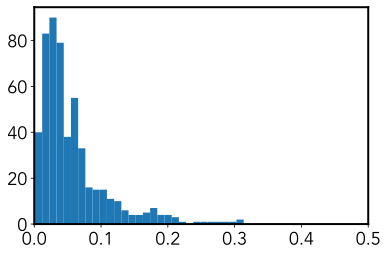

In [103]:
plt.hist(BAT_105m_Seyfert_data_redshift_notnull_numeric,bins=50)
plt.xlim(0,0.5)

# high variable

In [104]:
highvariable_5=BAT_105m_Seyfert_data[BAT_105m_Seyfert_data['sigma_m_w1_neo']>0.5]
highvariable_3=BAT_105m_Seyfert_data[BAT_105m_Seyfert_data['sigma_m_w1_neo']>0.3]
highvariable_1=BAT_105m_Seyfert_data[BAT_105m_Seyfert_data['sigma_m_w1_neo']>0.1]

In [109]:
highvariable_1.to_csv('/Users/brettlv/Downloads/CLAGN_statistic_plot/BAT_highvariable_1.csv',index=None)

In [105]:
def drop_index(data):
    data=data.reset_index(drop=True)
    return data

In [106]:
highvariable_5=drop_index(highvariable_5)
highvariable_3=drop_index(highvariable_3)
highvariable_1=drop_index(highvariable_1)

In [107]:
highvariable_5[['              COUNTERPART_NAME','     RA', '    DEC','S_type','sigma_m_w1_neo','pearson_coeff_neo']]

,COUNTERPART_NAME,RA,DEC,S_type,sigma_m_w1_neo,pearson_coeff_neo
0,Mrk 6,103.080,74.435,1.5,0.554318,0.995685
1,1WGA J0654.5+0703,103.632,7.045,1.9,1.313321,0.997628
2,2MASX J07262635-3554214,111.635,-35.894,2.0,0.522939,0.959133
3,WKK 1263,190.355,-57.837,1.5,1.286939,0.992447
4,WKK 4438,223.822,-51.577,1.5,0.519751,0.995930
5,Mrk 876,243.512,65.715,1.0,1.267329,0.991630
6,1RXS J165605.6-520345,254.037,-52.054,1.2,0.534726,0.995171
7,MCG +06-49-019,336.741,36.406,2.0,1.112946,0.993168
8,UGC 12282,344.696,40.918,2.0,1.525857,0.996183
9,2MASX J17412808+0348514,265.355,3.759,1.0,1.318488,0.990922


## light curve

<ipython-input-121-be2e524066ad>:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,4))


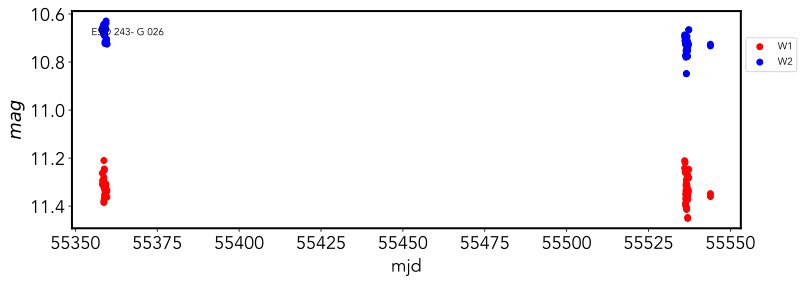

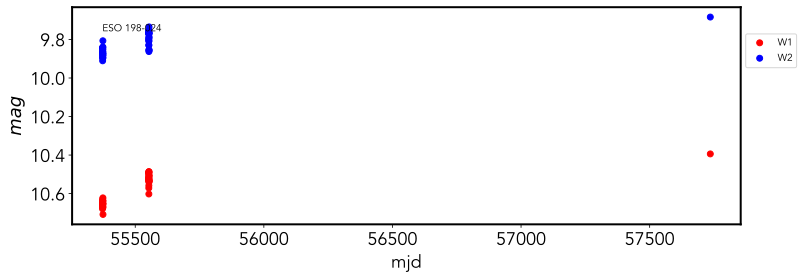

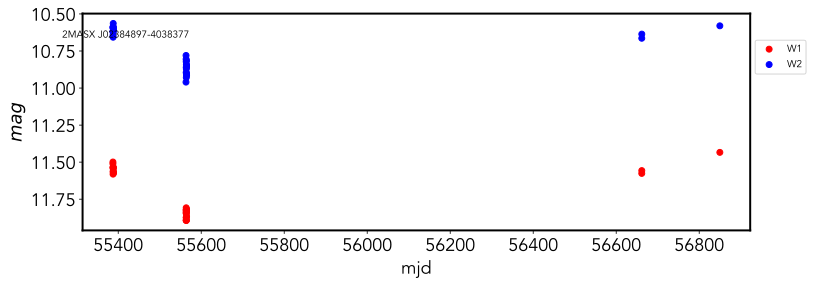

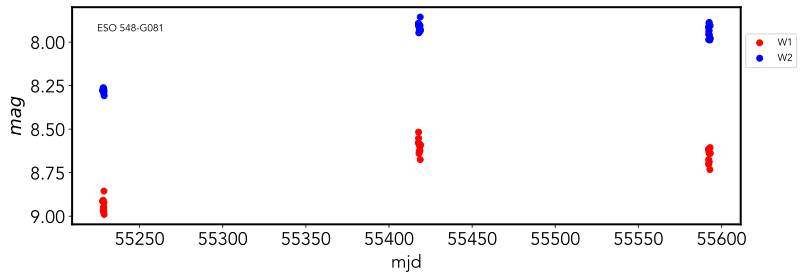

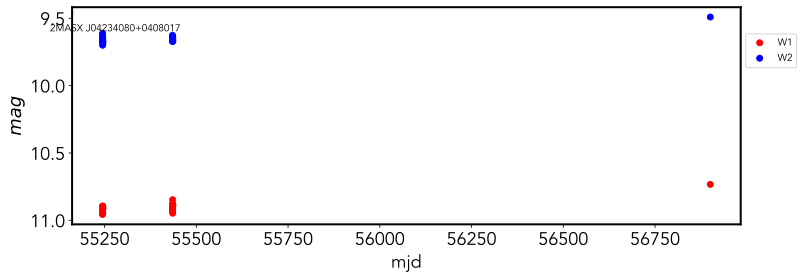

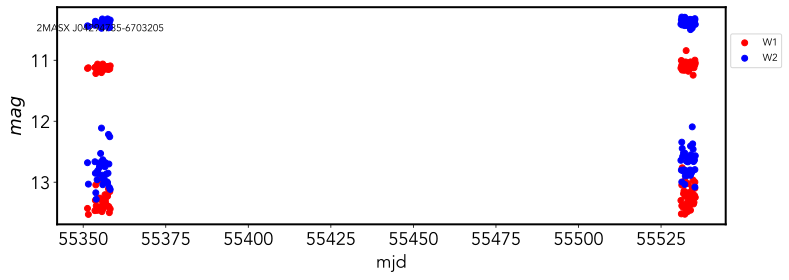

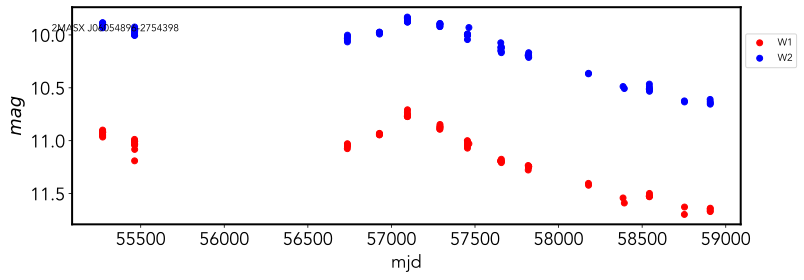

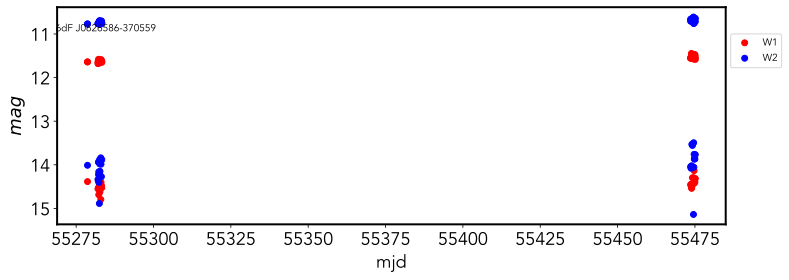

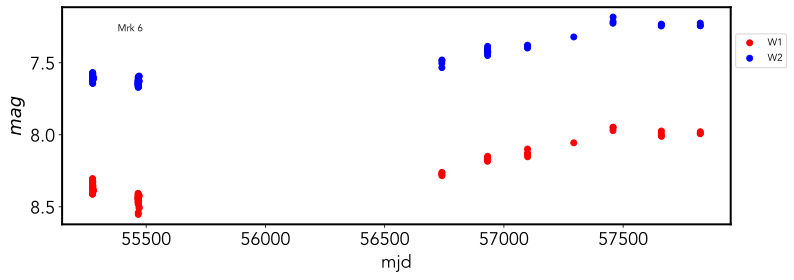

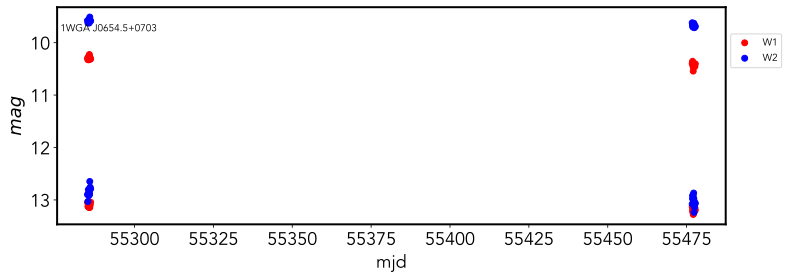

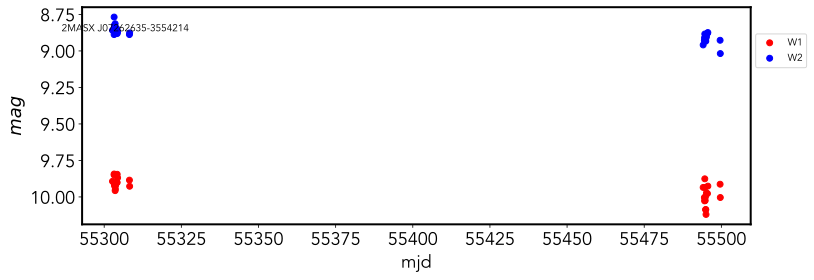

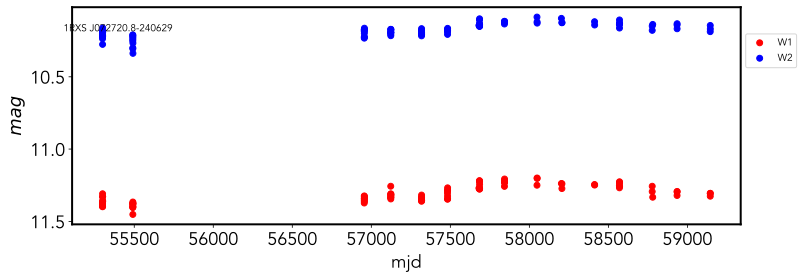

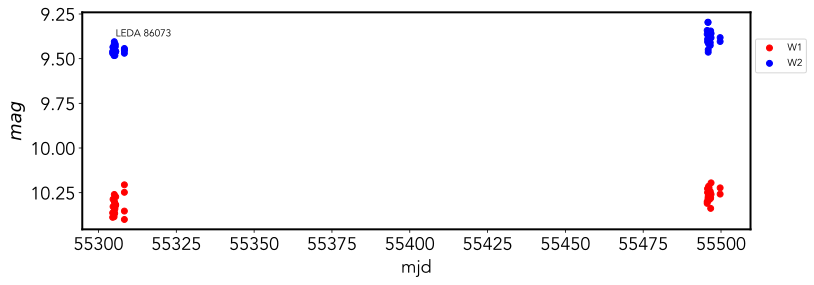

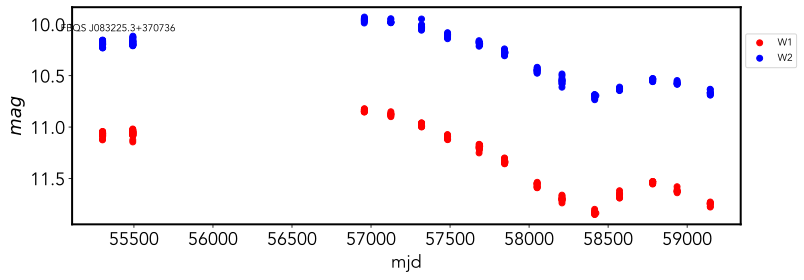

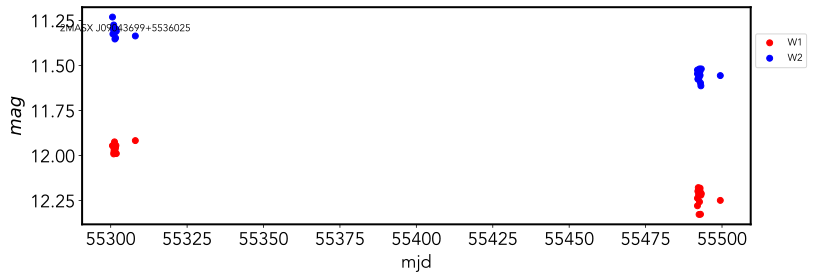

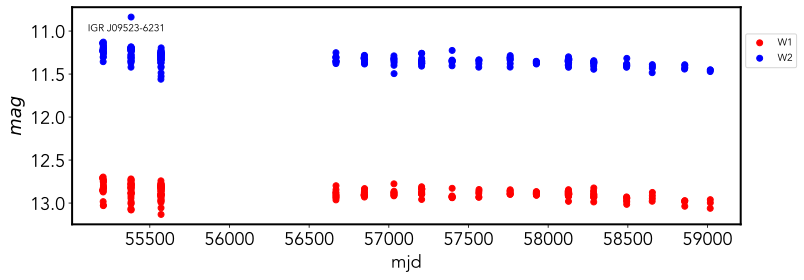

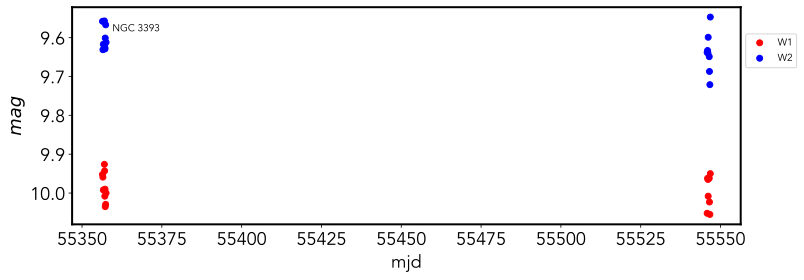

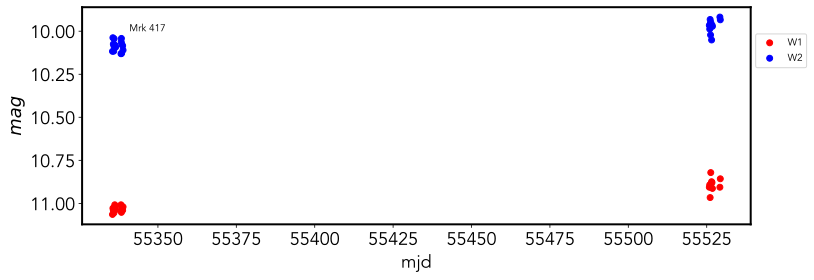

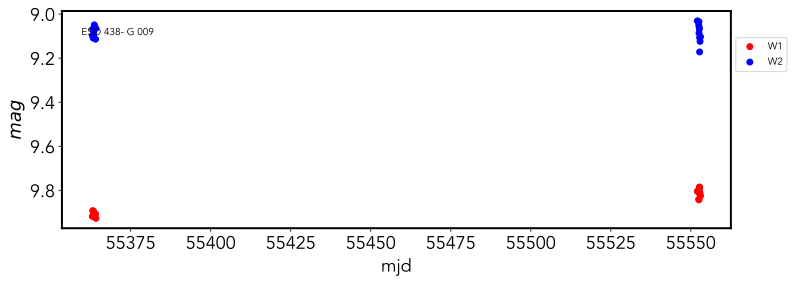

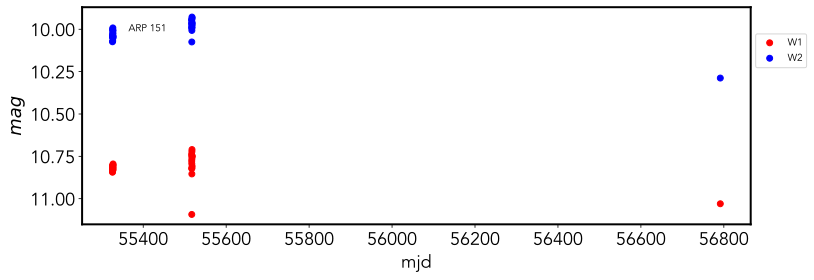

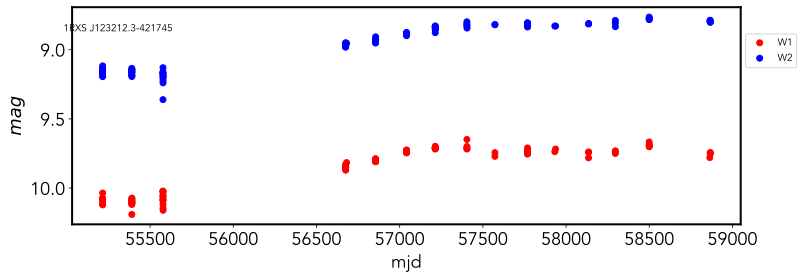

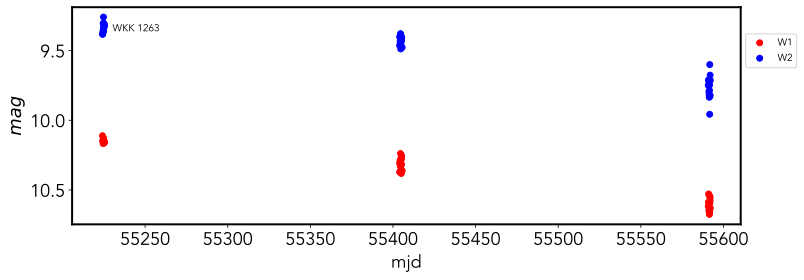

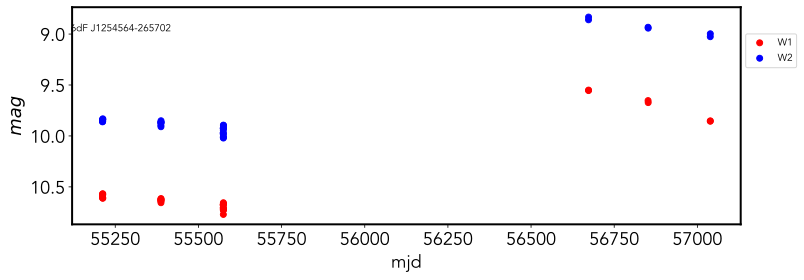

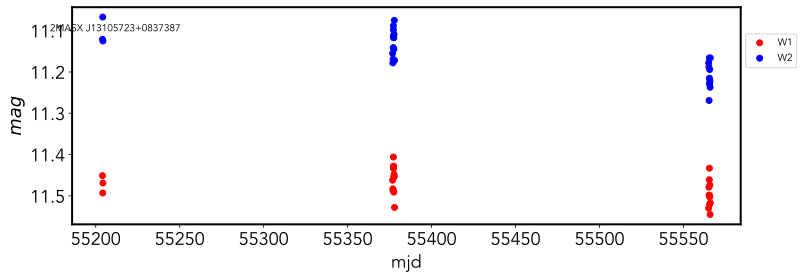

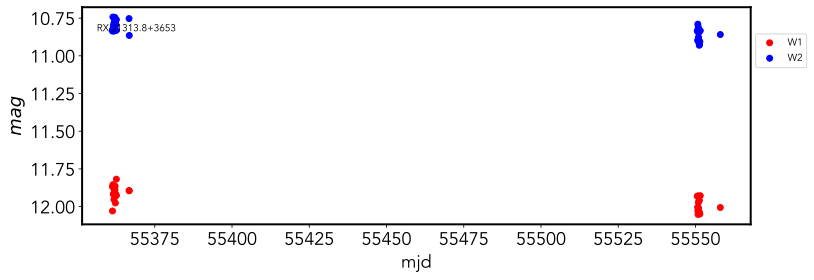

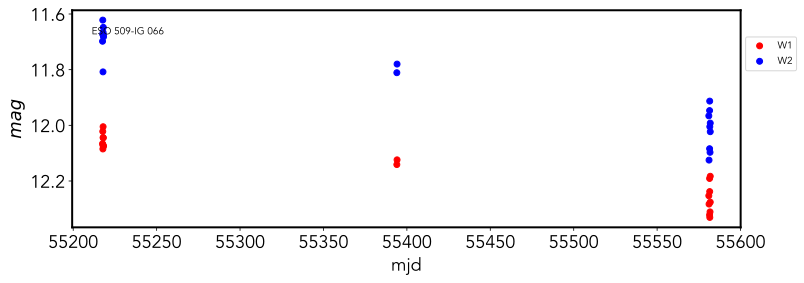

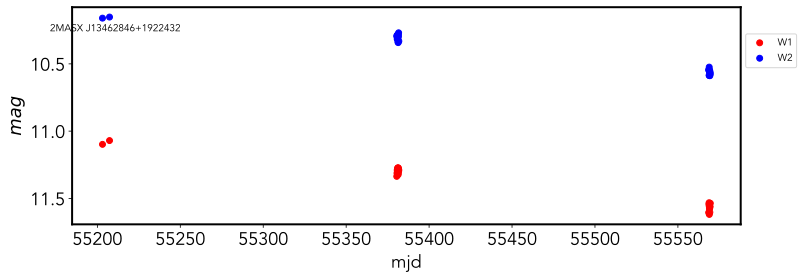

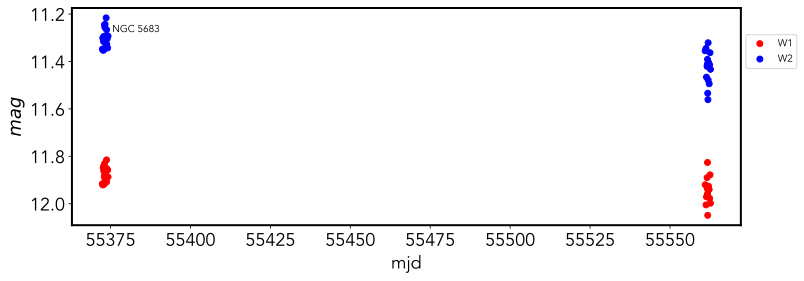

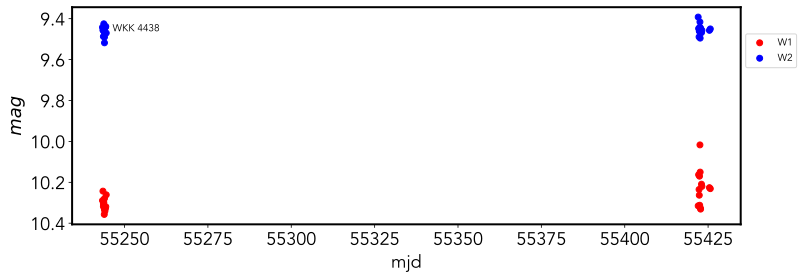

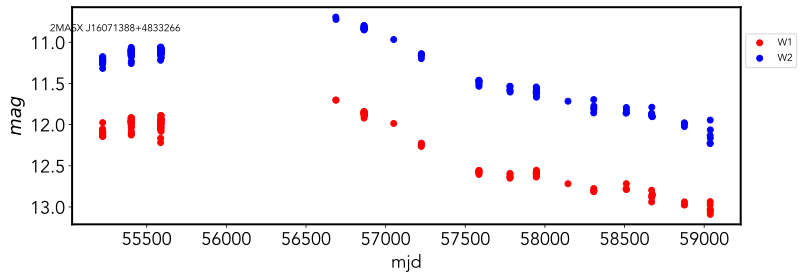

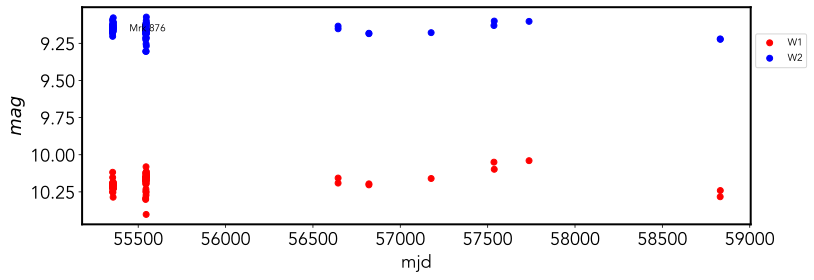

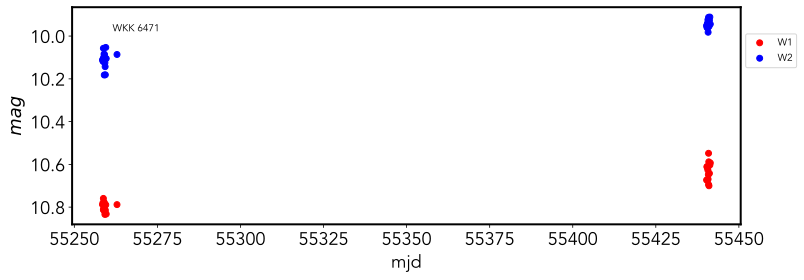

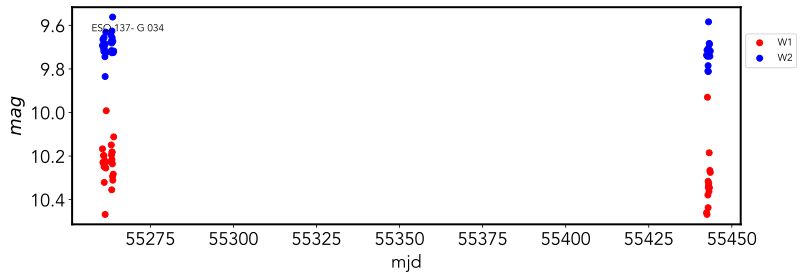

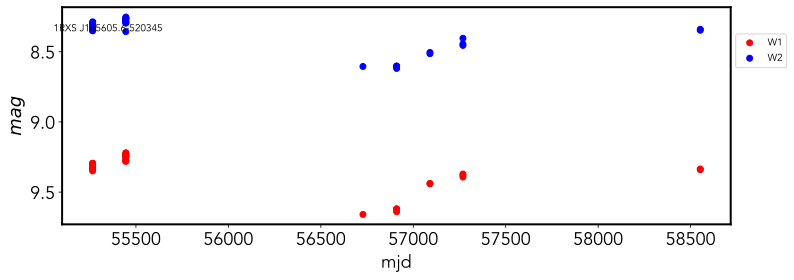

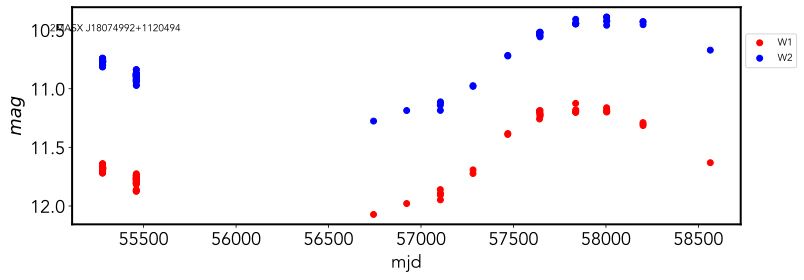

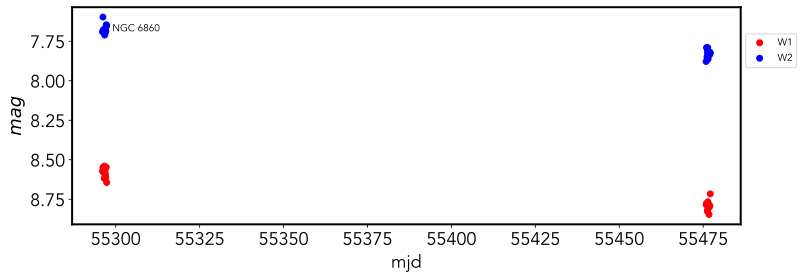

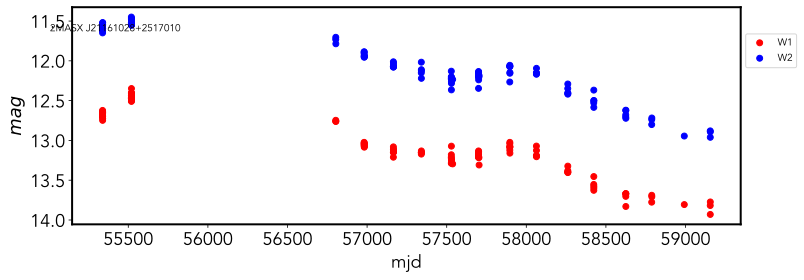

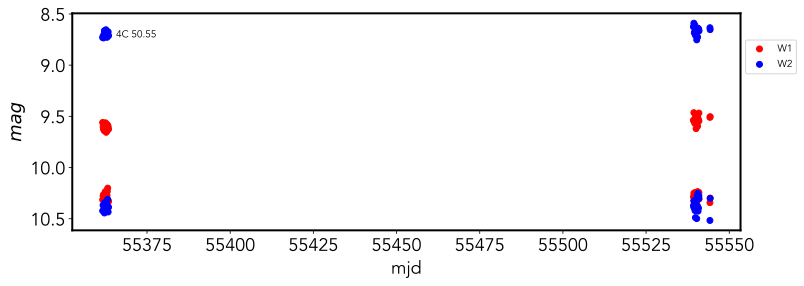

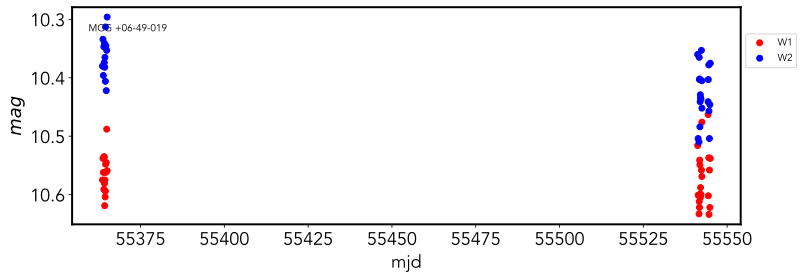

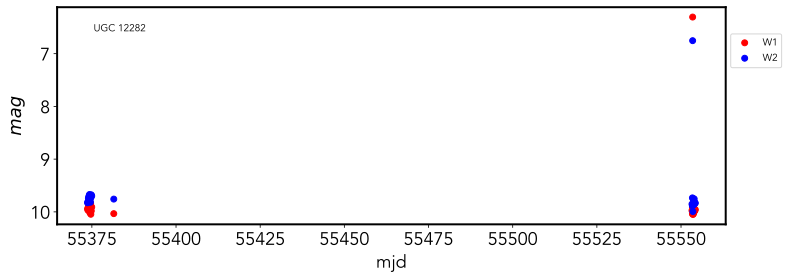

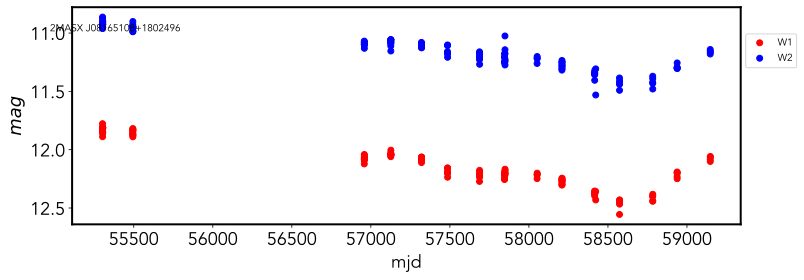

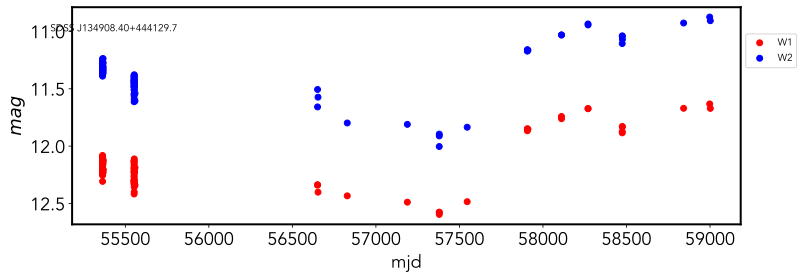

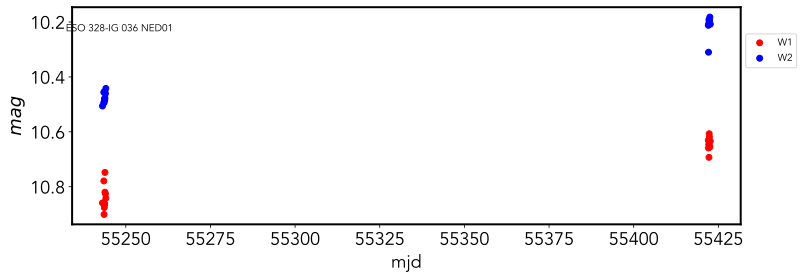

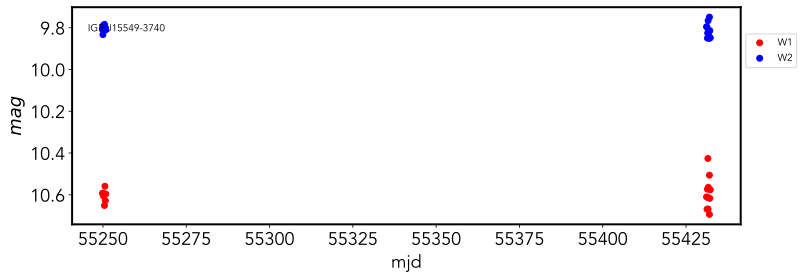

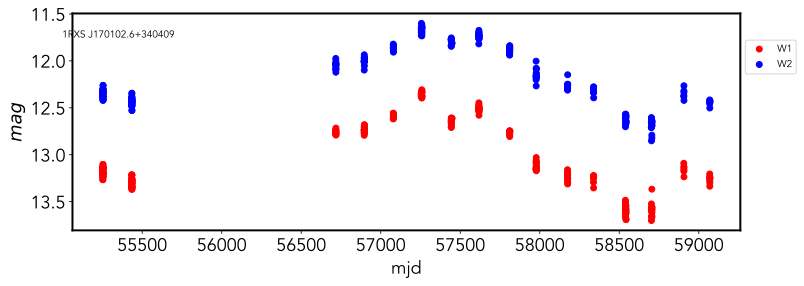

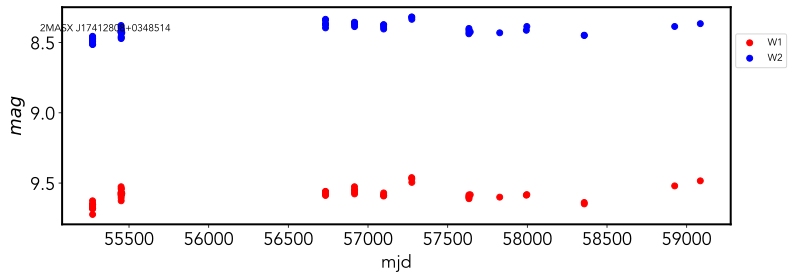

In [121]:
for index_test in range(len(highvariable_3['              COUNTERPART_NAME'])):
    name_test=highvariable_3['              COUNTERPART_NAME'][index_test]
    #print(name_test)
    search_name=name_test.replace(' ','') 
    save_name=search_name

    data_test_neo=pd.read_csv('wise_%s_neo.csv'%save_name)
    data_test_neo=data_test_neo[data_test_neo['w1mpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w2mpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w1sigmpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w2sigmpro'].notnull()]
    #data_test_neo=data_test_neo[data_test_neo['w1mpro']<15]
    #data_test_neo=data_test_neo[data_test_neo['w2mpro']<13] 
    data_test_neo=data_test_neo[data_test_neo['w1snr']>10]
    data_test_neo=data_test_neo[data_test_neo['w2snr']>10]
    
    data_test_neo=data_test_neo[data_test_neo['w1rchi2']<2]
    data_test_neo=data_test_neo[data_test_neo['w2rchi2']<2]
    
    data_test_neo=data_test_neo[data_test_neo['qual_frame']>5]
    
    #print(len(data_test_neo))
    data_test_neo=(data_test_neo.loc[:, ['mjd', 'w1mpro','w2mpro',
                                 'w1sigmpro','w2sigmpro',
                                 ]].sort_values('mjd'))

    data_test_neo=data_test_neo.reset_index(drop=True)
    #print(data_test_neo.columns)

    data_test_mep=pd.read_csv('wise_%s_mep.csv'%save_name)
    data_test_mep=data_test_mep[data_test_mep['w1mpro_ep'].notnull()]
    data_test_mep=data_test_mep[data_test_mep['w2mpro_ep'].notnull()]
    data_test_mep=data_test_mep[data_test_mep['w1sigmpro_ep'].notnull()]
    data_test_mep=data_test_mep[data_test_mep['w2sigmpro_ep'].notnull()]
    #data_test_mep=data_test_mep[data_test_mep['qual_frame']>5]
    data_test_mep=data_test_mep[data_test_mep['qi_fact']>0]
    data_test_mep=data_test_mep[data_test_mep['saa_sep']>0]

    #print(len(data_test_mep))
    data_test_mep=(data_test_mep.loc[:, ['mjd', 'w1mpro_ep','w2mpro_ep',
                                         'w1sigmpro_ep','w2sigmpro_ep',
                                         ]].sort_values('mjd'))

    data_test_mep=data_test_mep.reset_index(drop=True)
    #print(data_test_mep.columns)
    
    fig = plt.figure(figsize=(12,4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)

    ax.scatter(data_test_neo['mjd'],data_test_neo['w1mpro'],color='red',label='W1')
    ax.scatter(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],color='red',label='W1')

    
    ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
    ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.9),ncol=1,
          loc=2,fontsize=10)
    
    bottom, top = plt.ylim() 
    plt.ylim(top,bottom)
    
    plt.xlabel('mjd')
    plt.ylabel(r'$mag$')
    
    ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
    plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/BATlc/WISE_lc_highvariable_3_%s.png'%save_name, 
            dpi=400, transparent=False, bbox_inches='tight')
    #plt.semilogy()    

In [ ]:
index_test=0
name_test=BAT_105m_Seyfert_data_high_var['              COUNTERPART_NAME'][index_test]
print(name_test)
search_name=name_test.replace(' ','') 
save_name=search_name

data_test_neo=pd.read_csv('wise_%s_neo.csv'%save_name)
data_test_neo=data_test_neo[data_test_neo['w1mpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w2mpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w1sigmpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w2sigmpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['qual_frame']>5]
print(len(data_test_neo))
data_test_neo=(data_test_neo.loc[:, ['mjd', 'w1mpro','w2mpro',
                             'w1sigmpro','w2sigmpro',
                             ]].sort_values('mjd'))

data_test_neo=data_test_neo.reset_index(drop=True)
print(data_test_neo.columns)

data_test_mep=pd.read_csv('wise_%s_mep.csv'%save_name)
data_test_mep=data_test_mep[data_test_mep['w1mpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w2mpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w1sigmpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w2sigmpro_ep'].notnull()]
#data_test_mep=data_test_mep[data_test_mep['qual_frame']>5]
data_test_mep=data_test_mep[data_test_mep['qi_fact']>0]
data_test_mep=data_test_mep[data_test_mep['saa_sep']>0]
    
print(len(data_test_mep))
data_test_mep=(data_test_mep.loc[:, ['mjd', 'w1mpro_ep','w2mpro_ep',
                                     'w1sigmpro_ep','w2sigmpro_ep',
                                     ]].sort_values('mjd'))

data_test_mep=data_test_mep.reset_index(drop=True)
print(data_test_mep.columns)

In [ ]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plt.scatter(data_test_neo['mjd'],data_test_neo['w1mpro'],color='red',label='W1')
plt.scatter(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],color='red',label='W1')


plt.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
plt.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')


plt.xlabel('mjd')
plt.ylabel(r'$mag$')
#plt.ylim(18,0)
ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
#plt.semilogy()

In [ ]:
BAT_105m_Seyfert_data[BAT_105m_Seyfert_data['sigma_m_w2_neo']>0.5]

## sigma w1 w2

In [ ]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(BAT_105m_Seyfert_data[:])):
    label=BAT_105m_Seyfert_data.iloc[i]['S_type']    
    if label>1.9:        
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
        
    elif label>1.5:
        color='red'
        marker='o'
        
    elif label>1.2:
        color='red'
        marker='^' 
        
    elif label>1.0:
        color='red'
        marker='s'   
        
    else:    
        color='red'
        marker='*'
        
    ax.scatter(BAT_105m_Seyfert_data.iloc[i]['sigma_m_w1_neo'],
               BAT_105m_Seyfert_data.iloc[i]['sigma_m_w2_neo'],  
               color=color,
               marker=marker,
               label=label,s=5)    

#plt.xlabel('mean mag')
plt.xlabel(r'$\sigma_m w1$')
plt.ylabel(r'$\sigma_m w2$')
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#by_label = OrderedDict(zip(labels, hdl)) 

labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#按key排序
#kd = collections.OrderedDict(sorted(dd.items(), key=lambda t: t[0]))
#按照value排序
#vd = collections.OrderedDict(sorted(dd.items(),key=lambda t:t[1]))

set_ax_tick(ax)
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.95),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_sigma_w1_w2.png', 
            dpi=400, transparent=False, bbox_inches='tight')

#plt.xlim(18,0)
#ax.text(0.1, 0.9, 'w1_neo', horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
#plt.semilogy()

In [ ]:
by_label.values()

In [ ]:
by_label.keys()

In [ ]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(BAT_105m_Seyfert_data[:])):
    label=BAT_105m_Seyfert_data.iloc[i]['S_type']    
    if label>1.9:        
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
        
    elif label>1.5:
        color='red'
        marker='o'
        
    elif label>1.2:
        color='red'
        marker='^' 
        
    elif label>1.0:
        color='red'
        marker='s'   
        
    else:    
        color='red'
        marker='*'
        
    ax.scatter(BAT_105m_Seyfert_data.iloc[i]['mean_m_w1_neo'],
               BAT_105m_Seyfert_data.iloc[i]['mean_m_w2_neo'],  
               color=color,
               marker=marker,
               label=label,s=5)    

#plt.xlabel('mean mag')
plt.xlabel(r'$w1$')
plt.ylabel(r'$w2$')
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#by_label = OrderedDict(zip(labels, hdl)) 

labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#按key排序
#kd = collections.OrderedDict(sorted(dd.items(), key=lambda t: t[0]))
#按照value排序
#vd = collections.OrderedDict(sorted(dd.items(),key=lambda t:t[1]))

set_ax_tick(ax)
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.95),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_mag_w1_w2.png', 
            dpi=400, transparent=False, bbox_inches='tight')

#plt.xlim(18,0)
#ax.text(0.1, 0.9, 'w1_neo', horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
#plt.semilogy()

In [ ]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(BAT_105m_Seyfert_data[:])):
    label=BAT_105m_Seyfert_data.iloc[i]['S_type']    
    if label>1.9:        
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
        
    elif label>1.5:
        color='red'
        marker='o'
        
    elif label>1.2:
        color='red'
        marker='^' 
        
    elif label>1.0:
        color='red'
        marker='s'   
        
    else:    
        color='red'
        marker='*'
        
    ax.scatter(BAT_105m_Seyfert_data.iloc[i]['mean_m_w1_neo'],
               BAT_105m_Seyfert_data.iloc[i]['mean_m_w1_neo']-BAT_105m_Seyfert_data.iloc[i]['mean_m_w2_neo'],
               color=color,
               marker=marker,
               label=label,s=5)    

#plt.xlabel('mean mag')
plt.xlabel(r'$w1$')
plt.ylabel(r'$w1-w2$')
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#by_label = OrderedDict(zip(labels, hdl)) 

labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#按key排序
#kd = collections.OrderedDict(sorted(dd.items(), key=lambda t: t[0]))
#按照value排序
#vd = collections.OrderedDict(sorted(dd.items(),key=lambda t:t[1]))

set_ax_tick(ax)
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.95),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_mag_w1_w1-w2.png', 
            dpi=400, transparent=False, bbox_inches='tight')

#plt.xlim(18,0)
#ax.text(0.1, 0.9, 'w1_neo', horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
#plt.semilogy()

## S_type_var

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)
for i in range(len(BAT_105m_Seyfert_data)):
    type1or2=BAT_105m_Seyfert_data['S_type'][i]
    #print(type1or2)
    if type1or2>=1.9:
        color='blue'
        label='W1'
        marker='*'
    else:
        color='blue'
        label='W1'
        marker='o'
    #ax.text(type1or2,BAT_105m_Seyfert_data.iloc[i]['sigma_m_w1_neo'],BAT_105m_Seyfert_data.iloc[i]['Name'],fontsize = 8)
    
    ax.scatter(type1or2,BAT_105m_Seyfert_data.iloc[i]['sigma_m_w1_neo'],
                color=color,marker=marker,
                label=label)
    
#ax2 = fig.add_subplot(122)

#for i in range(len(BAT_105m_Seyfert_data)):
    #print(type1or2)
    if type1or2>=1.9:
        color='red'
        label='W2'
        marker='*'
    else:
        color='red'
        label='W2'
        marker='o'
    
    #ax2.text(type1or2,BAT_105m_Seyfert_data.iloc[i]['sigma_m_w2_neo'],BAT_105m_Seyfert_data.iloc[i]['Name'],fontsize = 8)
    
    ax.scatter(type1or2,BAT_105m_Seyfert_data.iloc[i]['sigma_m_w2_neo'],
                color=color,marker=marker,
                label=label)
    
ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_ylabel(r'$\sigma_m$')
ax.set_xlim(0.5,2.5)

#ax2.set_xlim(0,3)
#ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',labelsize=0)
#ax.text(0.1, 0.1, 'w1_neo', horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
set_ax_tick(ax)

handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
#plt.semilogy()    
fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert.png', 
            dpi=400, transparent=False, bbox_inches='tight')


In [ ]:
BAT_105m_Seyfert_data[BAT_105m_Seyfert_data['sigma_m_w1_neo']>1.0]

### S_type_Lum

In [ ]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(BAT_105m_Seyfert_data[:])):
    label=BAT_105m_Seyfert_data.iloc[i]['S_type']    
    if label>1.9:        
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
        
    elif label>1.5:
        color='red'
        marker='o'
        
    elif label>1.2:
        color='red'
        marker='^' 
        
    elif label>1.0:
        color='red'
        marker='s'   
        
    else:    
        color='red'
        marker='*'
    if BAT_105m_Seyfert_data.iloc[i]['  LUM']!='     ':   
        ax.scatter(float(BAT_105m_Seyfert_data.iloc[i]['  LUM']),
                   BAT_105m_Seyfert_data.iloc[i]['sigma_m_w1_neo'],
                color=color,marker=marker,
                label=label)   

ax.set_xlabel('log Luminosity(14-195 keV)')
ax.set_ylabel(r'$\sigma_m W1$')

handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#by_label = OrderedDict(zip(labels, hdl)) 

labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#按key排序
#kd = collections.OrderedDict(sorted(dd.items(), key=lambda t: t[0]))
#按照value排序
#vd = collections.OrderedDict(sorted(dd.items(),key=lambda t:t[1]))

set_ax_tick(ax)
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.95),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_mag_w1_w2.png', 
            dpi=400, transparent=False, bbox_inches='tight')

#plt.xlim(18,0)
#ax.text(0.1, 0.9, 'w1_neo', horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
#plt.semilogy()

### type1

In [ ]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(BAT_105m_Seyfert_data[:])):
    label=BAT_105m_Seyfert_data.iloc[i]['S_type']    
    if label>1.9:        
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
        
    elif label>1.5:
        color='red'
        marker='o'
        
    elif label>1.2:
        color='red'
        marker='^' 
        
    elif label>1.0:
        color='red'
        marker='s'   
        
    else:    
        color='red'
        marker='*'
    if BAT_105m_Seyfert_data.iloc[i]['  LUM']!='     ' and label>1.8:   
        ax.scatter(float(BAT_105m_Seyfert_data.iloc[i]['  LUM']),
                   BAT_105m_Seyfert_data.iloc[i]['sigma_m_w1_neo'],
                color=color,marker=marker,
                label=label)   

ax.set_xlabel('log Luminosity(14-195 keV)')
ax.set_ylabel(r'$\sigma_m W1$')

handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#by_label = OrderedDict(zip(labels, hdl)) 

labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#按key排序
#kd = collections.OrderedDict(sorted(dd.items(), key=lambda t: t[0]))
#按照value排序
#vd = collections.OrderedDict(sorted(dd.items(),key=lambda t:t[1]))

set_ax_tick(ax)
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.95),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_mag_w1_w2.png', 
            dpi=400, transparent=False, bbox_inches='tight')

#plt.xlim(18,0)
#ax.text(0.1, 0.9, 'w1_neo', horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
#plt.semilogy()

In [ ]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(BAT_105m_Seyfert_data[:])):
    label=BAT_105m_Seyfert_data.iloc[i]['S_type']    
    if label>1.9:        
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
        
    elif label>1.5:
        color='red'
        marker='o'
        
    elif label>1.2:
        color='red'
        marker='^' 
        
    elif label>1.0:
        color='red'
        marker='s'   
        
    else:    
        color='red'
        marker='*'
    if BAT_105m_Seyfert_data.iloc[i]['  LUM']!='     ' and label <1.9:   
        ax.scatter(float(BAT_105m_Seyfert_data.iloc[i]['  LUM']),
                   BAT_105m_Seyfert_data.iloc[i]['sigma_m_w1_neo'],
                color=color,marker=marker,
                label=label)   

ax.set_xlabel('log Luminosity(14-195 keV)')
ax.set_ylabel(r'$\sigma_m W1$')

handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#by_label = OrderedDict(zip(labels, hdl)) 

labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#按key排序
#kd = collections.OrderedDict(sorted(dd.items(), key=lambda t: t[0]))
#按照value排序
#vd = collections.OrderedDict(sorted(dd.items(),key=lambda t:t[1]))

set_ax_tick(ax)
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.95),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_mag_w1_w2.png', 
            dpi=400, transparent=False, bbox_inches='tight')

#plt.xlim(18,0)
#ax.text(0.1, 0.9, 'w1_neo', horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
#plt.semilogy()

## LX_LMIR

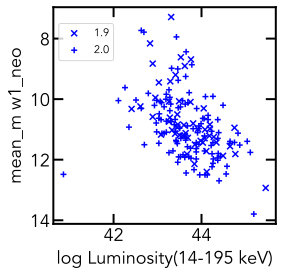

In [77]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(BAT_105m_Seyfert_data[:])):
    label=BAT_105m_Seyfert_data.iloc[i]['S_type']    
    if label>1.9:        
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
        
    elif label>1.5:
        color='red'
        marker='o'
        
    elif label>1.2:
        color='red'
        marker='^' 
        
    elif label>1.0:
        color='red'
        marker='s'   
        
    else:    
        color='red'
        marker='*'
    if BAT_105m_Seyfert_data.iloc[i]['  LUM']!='     ':
        if label>1.8:   
            ax.scatter(float(BAT_105m_Seyfert_data.iloc[i]['  LUM']),
                   BAT_105m_Seyfert_data.iloc[i]['mean_m_w1_neo'],
                   color=color,marker=marker,
                   label=label) 
            
bottom, top = plt.ylim() 
plt.ylim(top,bottom)
            
ax.set_xlabel('log Luminosity(14-195 keV)')
ax.set_ylabel(r'mean_m w1_neo')

handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#by_label = OrderedDict(zip(labels, hdl)) 

labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#按key排序
#kd = collections.OrderedDict(sorted(dd.items(), key=lambda t: t[0]))
#按照value排序
#vd = collections.OrderedDict(sorted(dd.items(),key=lambda t:t[1]))

set_ax_tick(ax)
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.95),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
#fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_mag_w1_w2.png',dpi=400, transparent=False, bbox_inches='tight')

#plt.xlim(18,0)
#ax.text(0.1, 0.9, 'w1_neo', horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
#plt.semilogy()

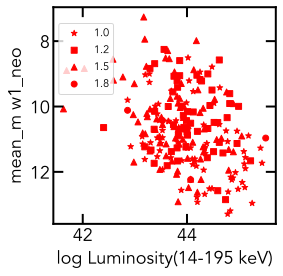

In [78]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(BAT_105m_Seyfert_data[:])):
    label=BAT_105m_Seyfert_data.iloc[i]['S_type']    
    if label>1.9:        
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
        
    elif label>1.5:
        color='red'
        marker='o'
        
    elif label>1.2:
        color='red'
        marker='^' 
        
    elif label>1.0:
        color='red'
        marker='s'   
        
    else:    
        color='red'
        marker='*'
    if BAT_105m_Seyfert_data.iloc[i]['  LUM']!='     ':
        if label<1.9:   
            ax.scatter(float(BAT_105m_Seyfert_data.iloc[i]['  LUM']),
                   BAT_105m_Seyfert_data.iloc[i]['mean_m_w1_neo'],
                   color=color,marker=marker,
                   label=label) 
            
bottom, top = plt.ylim() 
plt.ylim(top,bottom)
            
ax.set_xlabel('log Luminosity(14-195 keV)')
ax.set_ylabel(r'mean_m w1_neo')

handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#by_label = OrderedDict(zip(labels, hdl)) 

labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#按key排序
#kd = collections.OrderedDict(sorted(dd.items(), key=lambda t: t[0]))
#按照value排序
#vd = collections.OrderedDict(sorted(dd.items(),key=lambda t:t[1]))

set_ax_tick(ax)
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.95),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
#fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_mag_w1_w2.png',dpi=400, transparent=False, bbox_inches='tight')

#plt.xlim(18,0)
#ax.text(0.1, 0.9, 'w1_neo', horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
#plt.semilogy()

# data_1 and data_2

In [68]:
BAT_105m_Seyfert_data_2=BAT_105m_Seyfert_data[BAT_105m_Seyfert_data['S_type']>1.8]
BAT_105m_Seyfert_data_1=BAT_105m_Seyfert_data[BAT_105m_Seyfert_data['S_type']<1.9]
BAT_105m_Seyfert_data_1=BAT_105m_Seyfert_data_1.reset_index(drop=True)
BAT_105m_Seyfert_data_2=BAT_105m_Seyfert_data_2.reset_index(drop=True)

In [69]:
len(BAT_105m_Seyfert_data_1),len(BAT_105m_Seyfert_data_2)

(233, 178)

In [70]:
np.average(BAT_105m_Seyfert_data_1['sigma_m_w1_neo']),np.average(BAT_105m_Seyfert_data_2['sigma_m_w1_neo'])

(0.17592347967547284, 0.16944550858855215)

In [71]:
np.average(BAT_105m_Seyfert_data_1['sigma_m_w2_neo']),np.average(BAT_105m_Seyfert_data_2['sigma_m_w2_neo'])

(0.17762894196328627, 0.19317760985563998)

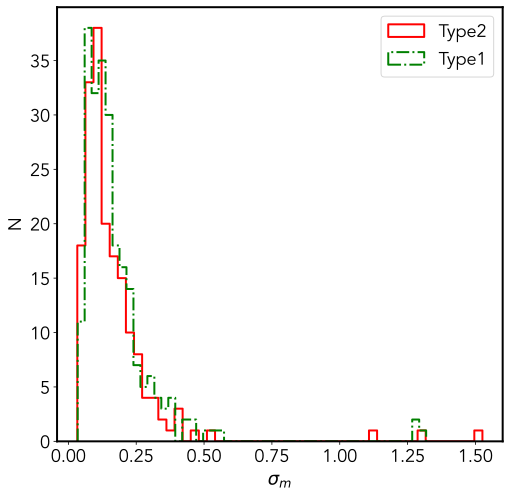

In [72]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

ax.hist(BAT_105m_Seyfert_data_2['sigma_m_w1_neo'],bins=50,lw=2,histtype='step',
        ec='red',fc="red",linestyle='-',
        label='Type2')
ax.hist(BAT_105m_Seyfert_data_1['sigma_m_w1_neo'],bins=50,lw=2,histtype='step',
                              ec='g', fc='g',label='Type1',linestyle='-.')

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\sigma_m$')
ax.set_ylabel(r'N')
#ax.set_xlim(0.5,2.5)
plt.legend()
fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_sigma_hist.png', 
            dpi=400, transparent=False, bbox_inches='tight')


## Lum_ sigma_m w1

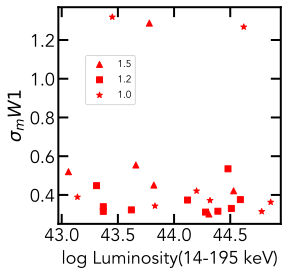

In [93]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

data_plot=highvariable_3

for i in range(len(data_plot['  LUM'])):
    label=data_plot.iloc[i]['S_type']
    if label>1.9:
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
    
    elif label>1.5:
        color='red'
        marker='o'

    elif label>1.2:
        color='red'
        marker='^'
    
    elif label>1.0:
        color='red'
        marker='s'

    else:
        color='red'
        marker='*'

    if data_plot.iloc[i]['  LUM']!='     ':
        #and BAT_105m_Seyfert_data.iloc[i]['GAMM']!='     ':
        if label<1.9:
            ax.scatter(float(data_plot.iloc[i]['  LUM']),
                       float(data_plot.iloc[i]['sigma_m_w1_neo']),
                       #ec='red',fc="red",
                       marker=marker,
                       color=color,
                       label=label)


set_ax_tick(ax)
#set_ax_locator(ax,xma=2,xmi=1,yma=1,ymi=0.1)
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel('log Luminosity(14-195 keV)')
ax.set_ylabel(r'$\sigma_m W1$')

#ax.set_xlim(0.5,2.5)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.1, 0.8),ncol=1,
          loc=2,fontsize=10)




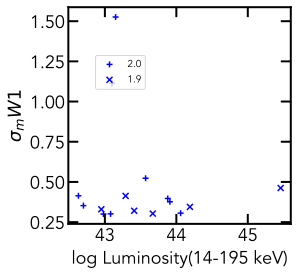

In [92]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

data_plot=highvariable_3

for i in range(len(data_plot['  LUM'])):
    label=data_plot.iloc[i]['S_type']
    if label>1.9:
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
    
    elif label>1.5:
        color='red'
        marker='o'

    elif label>1.2:
        color='red'
        marker='^'
    
    elif label>1.0:
        color='red'
        marker='s'

    else:
        color='red'
        marker='*'

    if data_plot.iloc[i]['  LUM']!='     ':
        #and BAT_105m_Seyfert_data.iloc[i]['GAMM']!='     ':
        if label>1.8:
            ax.scatter(float(data_plot.iloc[i]['  LUM']),
                       float(data_plot.iloc[i]['sigma_m_w1_neo']),
                       #ec='red',fc="red",
                       marker=marker,
                       color=color,
                       label=label)


set_ax_tick(ax)
#set_ax_locator(ax,xma=2,xmi=1,yma=1,ymi=0.1)
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel('log Luminosity(14-195 keV)')
ax.set_ylabel(r'$\sigma_m W1$')

#ax.set_xlim(0.5,2.5)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.1, 0.8),ncol=1,
          loc=2,fontsize=10)


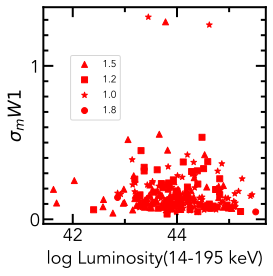

In [79]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(BAT_105m_Seyfert_data['  LUM'])):
    label=BAT_105m_Seyfert_data.iloc[i]['S_type']    
    if label>1.9:        
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
        
    elif label>1.5:
        color='red'
        marker='o'
        
    elif label>1.2:
        color='red'
        marker='^' 
        
    elif label>1.0:
        color='red'
        marker='s'   
        
    else:    
        color='red'
        marker='*'
        
    if BAT_105m_Seyfert_data.iloc[i]['  LUM']!='     ':
    #and BAT_105m_Seyfert_data.iloc[i]['GAMM']!='     ':
        if label<1.9:
            ax.scatter(float(BAT_105m_Seyfert_data.iloc[i]['  LUM']),
                   float(BAT_105m_Seyfert_data.iloc[i]['sigma_m_w1_neo']),
        #ec='red',fc="red",
        marker=marker,   
        color=color,
        label=label)
        

set_ax_tick(ax)
set_ax_locator(ax,xma=2,xmi=1,yma=1,ymi=0.1)
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 
    
#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel('log Luminosity(14-195 keV)')
ax.set_ylabel(r'$\sigma_m W1$')

#ax.set_xlim(0.5,2.5)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.1, 0.8),ncol=1,
          loc=2,fontsize=10)

plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_Lum_sigma_W1_1.png', 
            dpi=400, transparent=False, bbox_inches='tight')


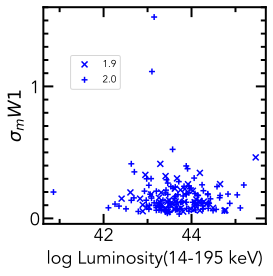

In [80]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(BAT_105m_Seyfert_data['  LUM'])):
    label=BAT_105m_Seyfert_data.iloc[i]['S_type']    
    if label>1.9:        
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
        
    elif label>1.5:
        color='red'
        marker='o'
        
    elif label>1.2:
        color='red'
        marker='^' 
        
    elif label>1.0:
        color='red'
        marker='s'   
        
    else:    
        color='red'
        marker='*'
        
    if BAT_105m_Seyfert_data.iloc[i]['  LUM']!='     ':
    #and BAT_105m_Seyfert_data.iloc[i]['GAMM']!='     ':
        if label>1.8:
            ax.scatter(float(BAT_105m_Seyfert_data.iloc[i]['  LUM']),
                   float(BAT_105m_Seyfert_data.iloc[i]['sigma_m_w1_neo']),
        #ec='red',fc="red",
        marker=marker,   
        color=color,
        label=label)
        

set_ax_tick(ax)
set_ax_locator(ax,xma=2,xmi=1,yma=1,ymi=0.1)
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 
    
#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel('log Luminosity(14-195 keV)')
ax.set_ylabel(r'$\sigma_m W1$')

#ax.set_xlim(0.5,2.5)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.1, 0.8),ncol=1,
          loc=2,fontsize=10)

plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_Lum_sigma_W1_2.png', 
            dpi=400, transparent=False, bbox_inches='tight')


## Lum Gamma

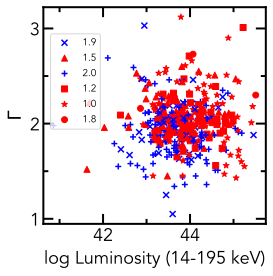

In [81]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(BAT_105m_Seyfert_data['  LUM'])):
    label=BAT_105m_Seyfert_data.iloc[i]['S_type']    
    if label>1.9:        
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
        
    elif label>1.5:
        color='red'
        marker='o'
        
    elif label>1.2:
        color='red'
        marker='^' 
        
    elif label>1.0:
        color='red'
        marker='s'   
        
    else:    
        color='red'
        marker='*'
        
    if BAT_105m_Seyfert_data.iloc[i]['  LUM']!='     'and BAT_105m_Seyfert_data.iloc[i]['GAMM']!='     ':
        ax.scatter(float(BAT_105m_Seyfert_data.iloc[i]['  LUM']),
                   float(BAT_105m_Seyfert_data.iloc[i]['GAMM']),
        #ec='red',fc="red",
        marker=marker,   
        color=color,
        label=label)
        
set_ax_tick(ax)
set_ax_locator(ax,xma=2,xmi=1,yma=1,ymi=0.5)
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 
    
#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')

#ax.set_xlim(0.5,2.5)
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.01, 0.9),ncol=1,
          loc=2,fontsize=10)
ax.set_xlabel('log Luminosity (14-195 keV)')
ax.set_ylabel(r'$\Gamma$')

plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_Lum_Gamma.png', 
            dpi=400, transparent=False, bbox_inches='tight')


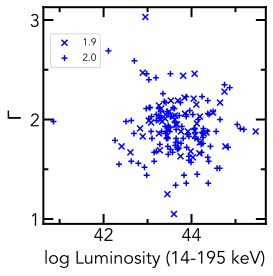

In [83]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(BAT_105m_Seyfert_data['  LUM'])):
    label=BAT_105m_Seyfert_data.iloc[i]['S_type']    
    if label>1.9:        
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
        
    elif label>1.5:
        color='red'
        marker='o'
        
    elif label>1.2:
        color='red'
        marker='^' 
        
    elif label>1.0:
        color='red'
        marker='s'   
        
    else:    
        color='red'
        marker='*'
        
    if BAT_105m_Seyfert_data.iloc[i]['  LUM']!='     'and BAT_105m_Seyfert_data.iloc[i]['GAMM']!='     ':
        if label>1.8:
            ax.scatter(float(BAT_105m_Seyfert_data.iloc[i]['  LUM']),
                   float(BAT_105m_Seyfert_data.iloc[i]['GAMM']),
        #ec='red',fc="red",
        marker=marker,   
        color=color,
        label=label)
        
set_ax_tick(ax)
set_ax_locator(ax,xma=2,xmi=1,yma=1,ymi=0.5)
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 
    
#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')

#ax.set_xlim(0.5,2.5)
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.01, 0.9),ncol=1,
          loc=2,fontsize=10)
ax.set_xlabel('log Luminosity (14-195 keV)')
ax.set_ylabel(r'$\Gamma$')

plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_Lum_Gamma_2.png', 
            dpi=400, transparent=False, bbox_inches='tight')


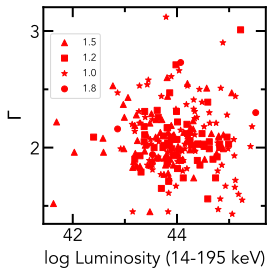

In [82]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(BAT_105m_Seyfert_data['  LUM'])):
    label=BAT_105m_Seyfert_data.iloc[i]['S_type']    
    if label>1.9:        
        color='blue'
        marker='+'
    elif label>1.8:
        color='blue'
        marker='x'
        
    elif label>1.5:
        color='red'
        marker='o'
        
    elif label>1.2:
        color='red'
        marker='^' 
        
    elif label>1.0:
        color='red'
        marker='s'   
        
    else:    
        color='red'
        marker='*'
        
    if BAT_105m_Seyfert_data.iloc[i]['  LUM']!='     'and BAT_105m_Seyfert_data.iloc[i]['GAMM']!='     ':
        if label<1.9:
            ax.scatter(float(BAT_105m_Seyfert_data.iloc[i]['  LUM']),
                   float(BAT_105m_Seyfert_data.iloc[i]['GAMM']),
        #ec='red',fc="red",
        marker=marker,   
        color=color,
        label=label)
        
set_ax_tick(ax)
set_ax_locator(ax,xma=2,xmi=1,yma=1,ymi=0.5)
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 
    
#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')

#ax.set_xlim(0.5,2.5)
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.01, 0.9),ncol=1,
          loc=2,fontsize=10)
ax.set_xlabel('log Luminosity (14-195 keV)')
ax.set_ylabel(r'$\Gamma$')

plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_BAT_105m_Seyfert_Lum_Gamma_1.png', 
            dpi=400, transparent=False, bbox_inches='tight')
